In [157]:
import matplotlib.pyplot as plt
import numpy as np
import os, scipy
import matplotlib.colors as mcolors
import pickle


# We import the model, stimuli, and the optimal control package
from neurolib.models.wc import WCModel
from neurolib.utils.stimulus import ZeroInput
from neurolib.optimal_control import oc_wc
from neurolib.optimal_control.oc_utils.plot_oc import plot_oc_nw

# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2

options = {
    'node_color': 'lightgray',
    'node_size': 1000,
    'width': 2,
    'arrowstyle': '-|>',
    'arrowsize': 20,
    'font_size' : 20,
    'font_weight' : 'bold',
    }

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


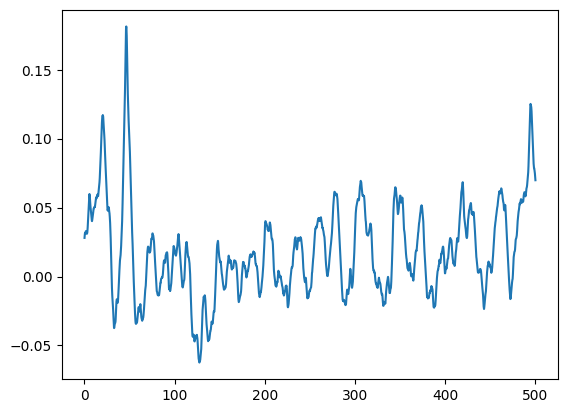

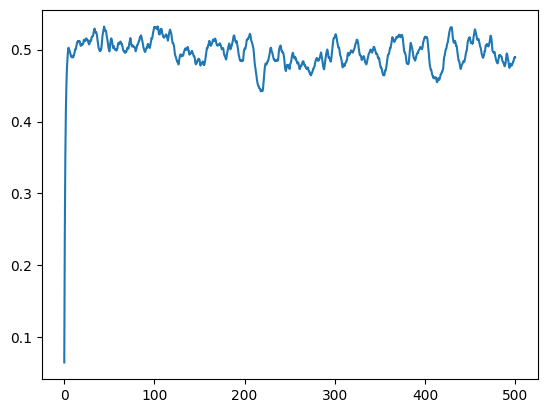

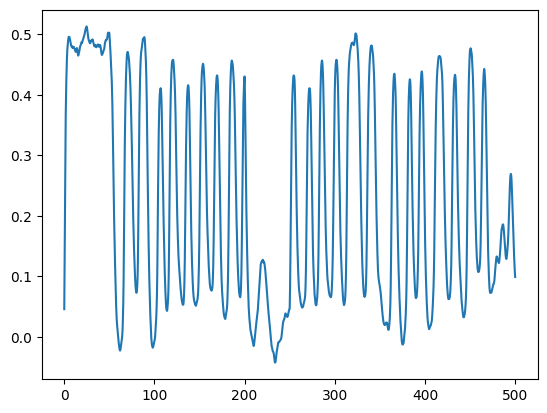

In [158]:
comp_points = [[0., 0.5], [4., 0.5], [2., 0.5]]

N = 1
dir = "images_1n"

colors = []
n = 0
for col in mcolors.TABLEAU_COLORS:
    colors.append(col)
    n += 1
    if n >= N: break

model = WCModel()

dt = 0.1
model.params['dt'] = dt # Integration time step, ms
model.params['duration'] = 1. * 500 # Simulation time, ms
model.params.signalV = 1.

zero_input = ZeroInput().generate_input(duration=model.params['duration']+model.params.dt, dt=model.params.dt)
rect_input = np.vstack( (zero_input)*2 )
rect_input[0,:500] = 1.
rect_input[0,2000:2500] = -1.

model.params.sigma_ou = 0.02

for p in comp_points:
    model.params["exc_ext"] = p[0] + rect_input[0,:]
    model.params["inh_ext"] = p[1]
    model.run()

    for n in range(N):
        plt.plot(model.t, model.exc[n,:], color=colors[n])
    plt.show()

    if p[0] == 1.:

        peaks = scipy.signal.find_peaks(model.exc[0,2000:5000])[0]
        plist = []
        for pind in range(1, len(peaks)):
            plist.append(model.params.dt * (peaks[pind]-peaks[pind-1]))

        period = np.mean(plist)
        print("period = ", period)


In [159]:
def getperiods(x, target_period, duration):
    timing_list = [None] * N
    periods_list = [None] * N

    npeaks = np.floor(duration / target_period)

    for n in range(N):
        prom = 10.

        while True:
            timing_list[n] = scipy.signal.find_peaks(x[n, 0, 300:], prominence=prom)[0]
            if prom < 1e-6:
                break
            if len(timing_list[n]) < npeaks:
                prom *= 0.8
            else: break    
        
        periods_list[n] = []
        if len(timing_list[n]) < 3:
            continue
        for pind in range(1, len(timing_list[n])):
            periods_list[n].append(model.params.dt * (timing_list[n][pind]-timing_list[n][pind-1]))

    return timing_list, periods_list

In [160]:
controlmat = np.zeros((N,2))
controlmat[:,0] = 1.

costmat = np.zeros((N, 2))
costmat[:,0] = 1.

duration = 200.
model.params.duration = duration
zero_input0 = ZeroInput().generate_input(duration=duration+model.params.dt, dt=model.params.dt)
zero_input = np.vstack( ([zero_input0]*2) )[np.newaxis,:,:]
zero_control = np.vstack( ([zero_input]*N))

print(zero_input0.shape, zero_input.shape, zero_control.shape)

w2_array = [1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
target_array = [0.7*period, period, 1.3*period]
M = 20
sigma_array = [0.005, 0.02]

results = dict()
results["controls"] = [ [ [[None, None], [None, None]], [[None, None], [None, None]], [[None, None], [None, None]], [[None, None], [None, None]], [[None, None], [None, None]], ],
                        [ [[None, None], [None, None]], [[None, None], [None, None]], [[None, None], [None, None]], [[None, None], [None, None]], [[None, None], [None, None]], ],
                        [ [[None, None], [None, None]], [[None, None], [None, None]], [[None, None], [None, None]], [[None, None], [None, None]], [[None, None], [None, None]], ],

]
results["periods"] = [ [ [[None, None], [None, None]], [[None, None], [None, None]], [[None, None], [None, None]], [[None, None], [None, None]], [[None, None], [None, None]], ],
                        [ [[None, None], [None, None]], [[None, None], [None, None]], [[None, None], [None, None]], [[None, None], [None, None]], [[None, None], [None, None]], ],
                        [ [[None, None], [None, None]], [[None, None], [None, None]], [[None, None], [None, None]], [[None, None], [None, None]], [[None, None], [None, None]], ],

]
results["timings"] = [ [ [[None, None], [None, None]], [[None, None], [None, None]], [[None, None], [None, None]], [[None, None], [None, None]], [[None, None], [None, None]], ],
                        [ [[None, None], [None, None]], [[None, None], [None, None]], [[None, None], [None, None]], [[None, None], [None, None]], [[None, None], [None, None]], ],
                        [ [[None, None], [None, None]], [[None, None], [None, None]], [[None, None], [None, None]], [[None, None], [None, None]], [[None, None], [None, None]], ],

]

(1, 3001) (1, 2, 3001) (1, 2, 3001)


pind =  0
itar =  0
itar =  1
itar =  2
itar =  3
itar =  4
M =  20
sigma =  0.005
Optimal control with target oscillation period
Compute control for a noisy system
Mean cost in iteration 0: -0.27719426989010887
Mean cost in iteration 5: -0.27877049375907037
Mean cost in iteration 10: -0.27916447592668403
Mean cost in iteration 15: -0.27899561814673035
Mean cost in iteration 20: -0.2793708990202903
Minimal cost found at iteration 18
Final cost validated with 200 noise realizations : -0.27920113252338036
step history :  [2000.0, 0.0, 1000.0, 1000.0, 2000.0, 2000.0, 1000.0, 2000.0, 2000.0, 2000.0, 2000.0, 250.0, 500.0, 125.0, 2000.0, 500.0, 2000.0, 500.0, 500.0, 2000.0, 250.0]


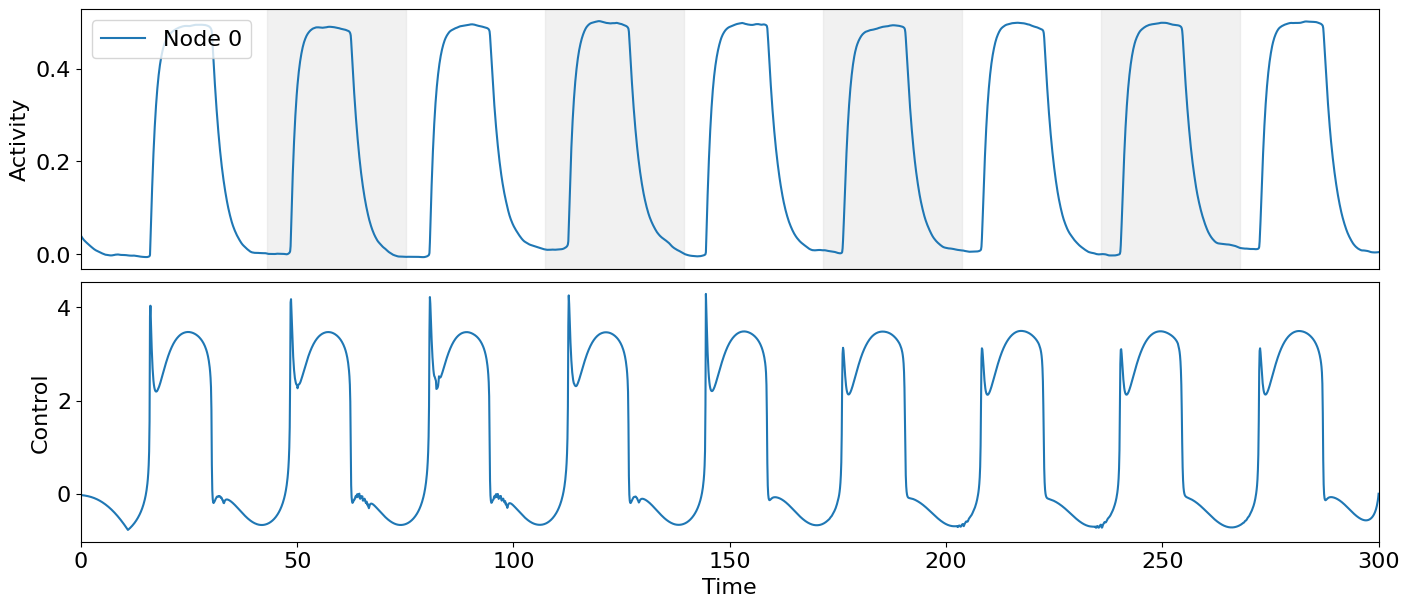

sigma =  0.02
Optimal control with target oscillation period
Compute control for a noisy system
Mean cost in iteration 0: -0.28143955025831136
Mean cost in iteration 5: -0.2783862884578522
Mean cost in iteration 10: -0.2800433553886415
Mean cost in iteration 15: -0.28156361978604716
Mean cost in iteration 20: -0.27858002588102926
Minimal cost found at iteration 15
Final cost validated with 200 noise realizations : -0.2796010525548132
step history :  [31.25, 250.0, 15.625, 500.0, 2000.0, 250.0, 500.0, 250.0, 1000.0, 1000.0, 125.0, 500.0, 1000.0, 2000.0, 250.0, 0.48828125, 500.0, 1000.0, 500.0, 2000.0]


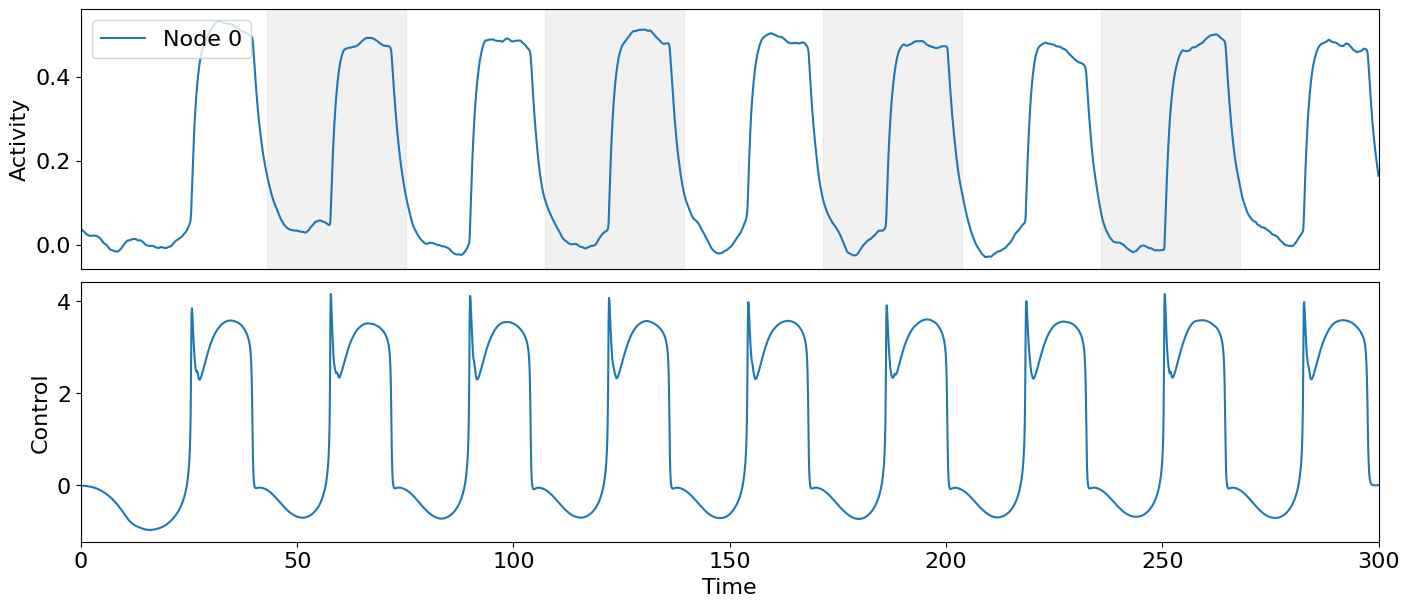

M =  40
sigma =  0.005
Optimal control with target oscillation period
Compute control for a noisy system
Mean cost in iteration 0: -0.27824305827054446
Mean cost in iteration 5: -0.2785649895817003
Mean cost in iteration 10: -0.27875726875478235
Mean cost in iteration 15: -0.27898716155126563
Mean cost in iteration 20: -0.27925712535240105
Minimal cost found at iteration 20
Final cost validated with 200 noise realizations : -0.2791794968638412
step history :  [500.0, 2000.0, 2000.0, 1000.0, 0.06103515625, 1000.0, 2000.0, 2000.0, 2000.0, 1000.0, 2000.0, 62.5, 2000.0, 500.0, 125.0, 2000.0, 250.0, 2000.0, 2000.0, 0.003814697265625]


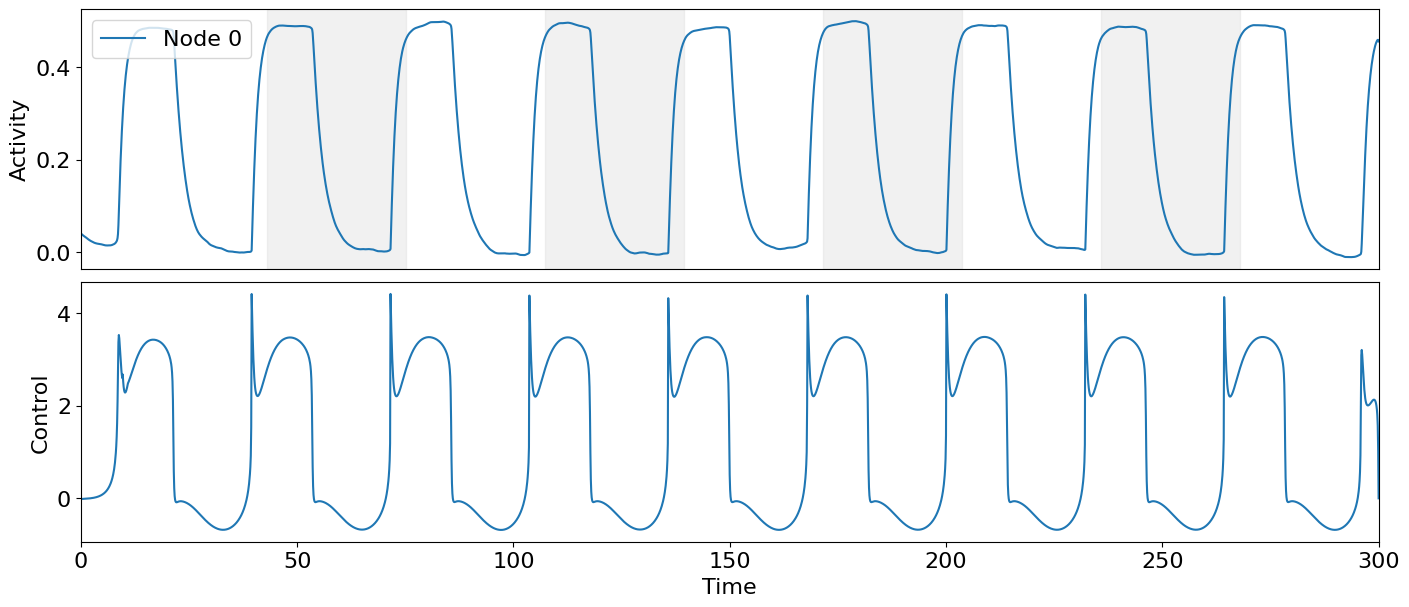

sigma =  0.02
Optimal control with target oscillation period
Compute control for a noisy system
Mean cost in iteration 0: -0.2788609803050786
Mean cost in iteration 5: -0.2787012298804594
Mean cost in iteration 10: -0.2787478642286086
Mean cost in iteration 15: -0.28060887008217894
Mean cost in iteration 20: -0.2786889084060015
Minimal cost found at iteration 15
Final cost validated with 200 noise realizations : -0.2790288798583882
step history :  [250.0, 2000.0, 15.625, 0.0, 2000.0, 15.625, 2000.0, 2000.0, 2000.0, 1000.0, 2000.0, 62.5, 2000.0, 2000.0, 0.0, 2000.0, 500.0, 15.625, 1000.0, 500.0, 2000.0, 0.003814697265625]


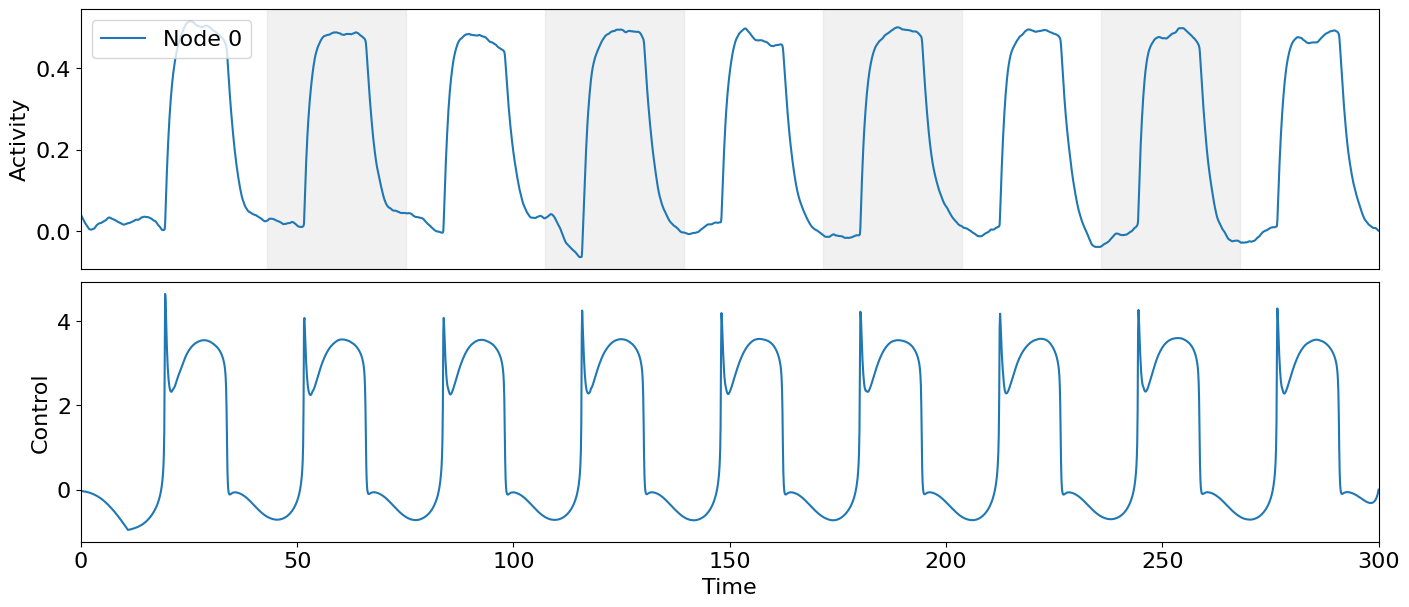

pind =  1
itar =  0
itar =  1
itar =  2
itar =  3
itar =  4
M =  20
sigma =  0.005
Optimal control with target oscillation period
Compute control for a noisy system
Mean cost in iteration 0: -0.26486005326148043
Mean cost in iteration 5: -0.26602635057241286
Mean cost in iteration 10: -0.2666324406595132
Mean cost in iteration 15: -0.26742663446001524
Mean cost in iteration 20: -0.26742951120566527
Minimal cost found at iteration 17
Final cost validated with 200 noise realizations : -0.2674186591868493
step history :  [0.0, 500.0, 2000.0, 2000.0, 500.0, 250.0, 250.0, 2000.0, 2000.0, 250.0, 2000.0, 1000.0, 2000.0, 0.0, 125.0, 2000.0, 250.0, 500.0, 2000.0, 125.0, 2000.0, 31.25]


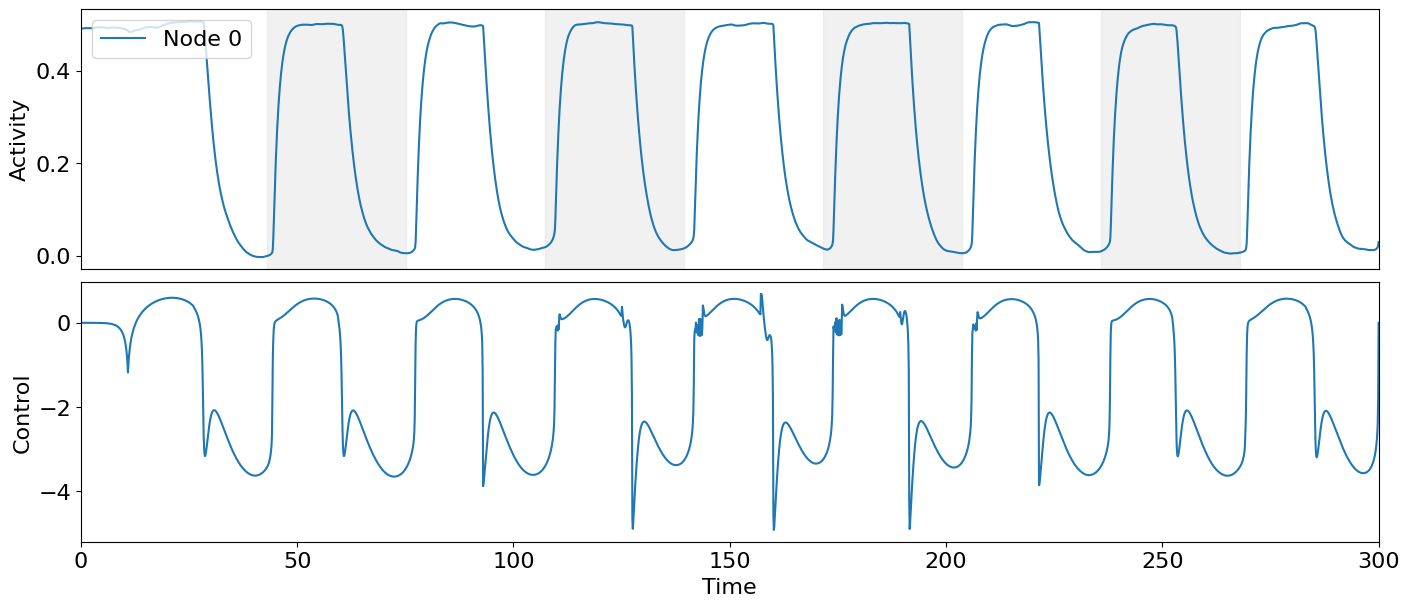

sigma =  0.02
Optimal control with target oscillation period
Compute control for a noisy system
Mean cost in iteration 0: -0.2709526628926656
Mean cost in iteration 5: -0.2745542704727466
Mean cost in iteration 10: -0.2745820128345132
Mean cost in iteration 15: -0.27331033690924905
Mean cost in iteration 20: -0.27439111122832516
Minimal cost found at iteration 16
Final cost validated with 200 noise realizations : -0.27445387997125253
step history :  [2000.0, 2000.0, 2000.0, 3.90625, 2000.0, 2000.0, 2000.0, 2000.0, 1000.0, 1000.0, 15.625, 1000.0, 0.0, 500.0, 500.0, 2000.0, 250.0, 500.0, 125.0, 1000.0, 2000.0]


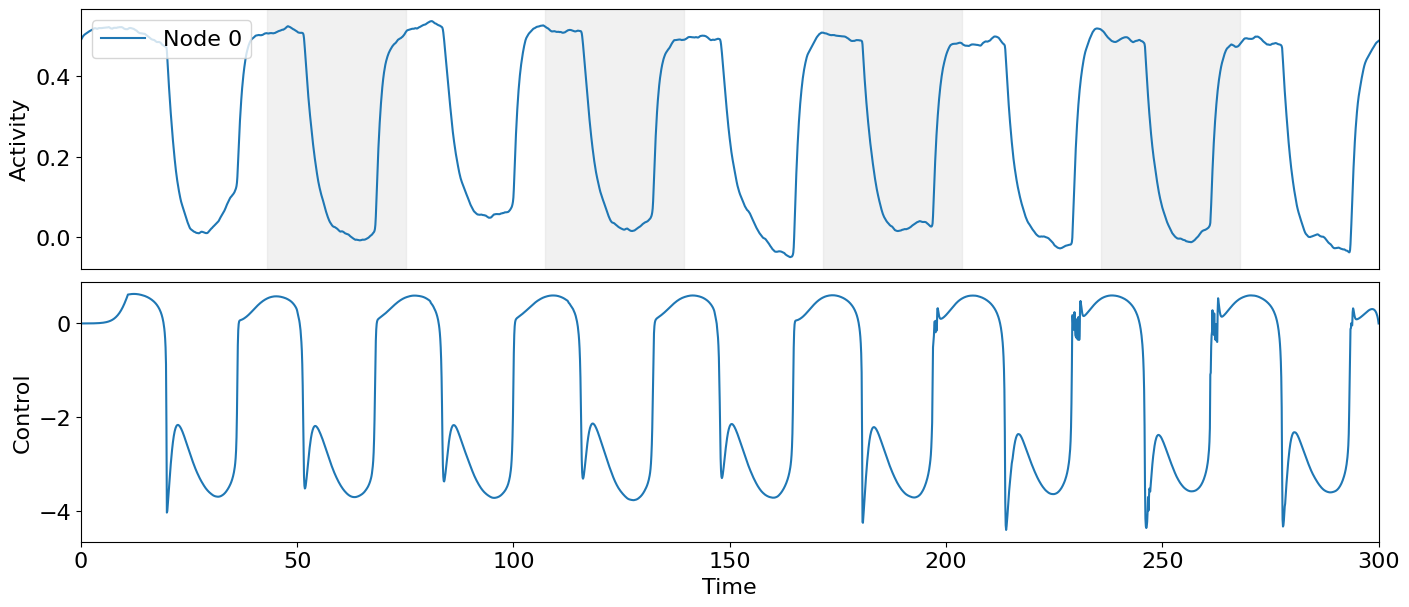

M =  40
sigma =  0.005
Optimal control with target oscillation period
Compute control for a noisy system
Mean cost in iteration 0: -0.27145895162312156
Mean cost in iteration 5: -0.2724744168034523
Mean cost in iteration 10: -0.2735918034735094
Mean cost in iteration 15: -0.2744818703450135
Mean cost in iteration 20: -0.27453676737402205
Minimal cost found at iteration 19
Final cost validated with 200 noise realizations : -0.2745542017973891
step history :  [500.0, 0.0, 2000.0, 2000.0, 2000.0, 0.0, 125.0, 2000.0, 2000.0, 2000.0, 1.953125, 0.0, 500.0, 7.8125, 2000.0, 500.0, 31.25, 2000.0, 250.0, 2000.0, 1000.0, 500.0, 62.5]


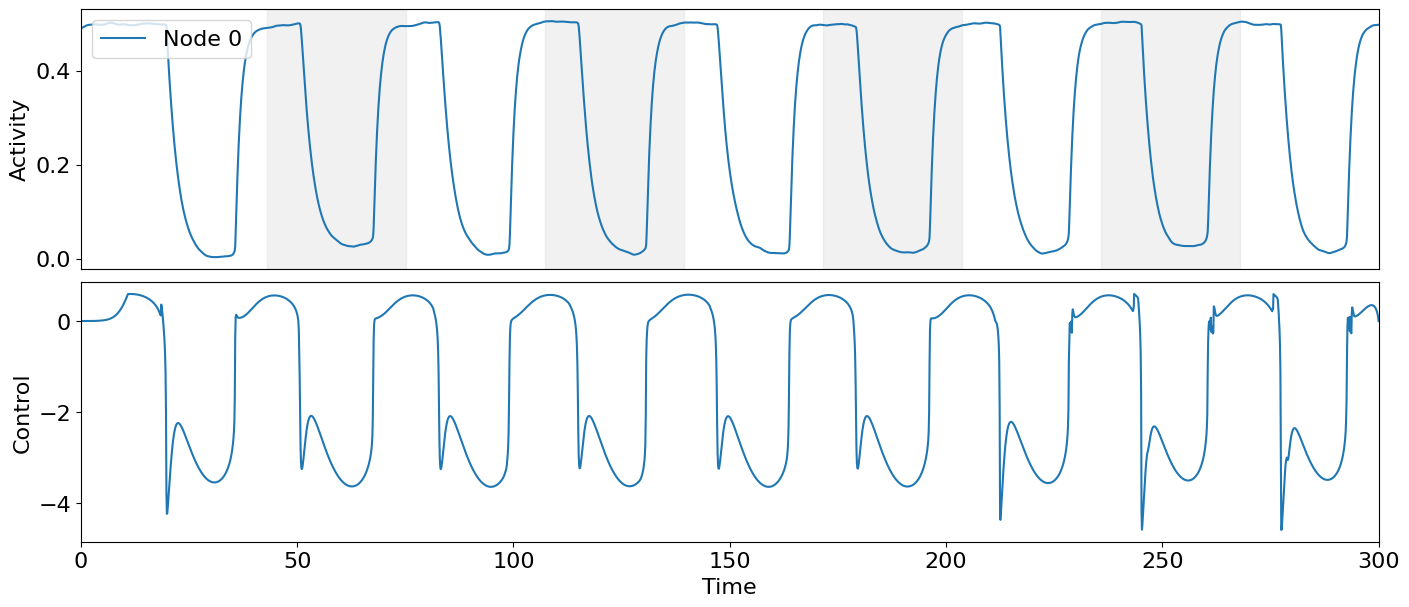

sigma =  0.02
Optimal control with target oscillation period
Compute control for a noisy system
Mean cost in iteration 0: -0.27324019164770674
Mean cost in iteration 5: -0.2725237927438998
Mean cost in iteration 10: -0.2745154406200604
Mean cost in iteration 15: -0.2752559759121286
Mean cost in iteration 20: -0.27528573369647347
Minimal cost found at iteration 18
Final cost validated with 200 noise realizations : -0.27492623558377366
step history :  [2000.0, 250.0, 3.90625, 2000.0, 2000.0, 31.25, 250.0, 2000.0, 250.0, 2000.0, 2000.0, 1000.0, 2000.0, 500.0, 1000.0, 2000.0, 2000.0, 2000.0, 2000.0, 1000.0]


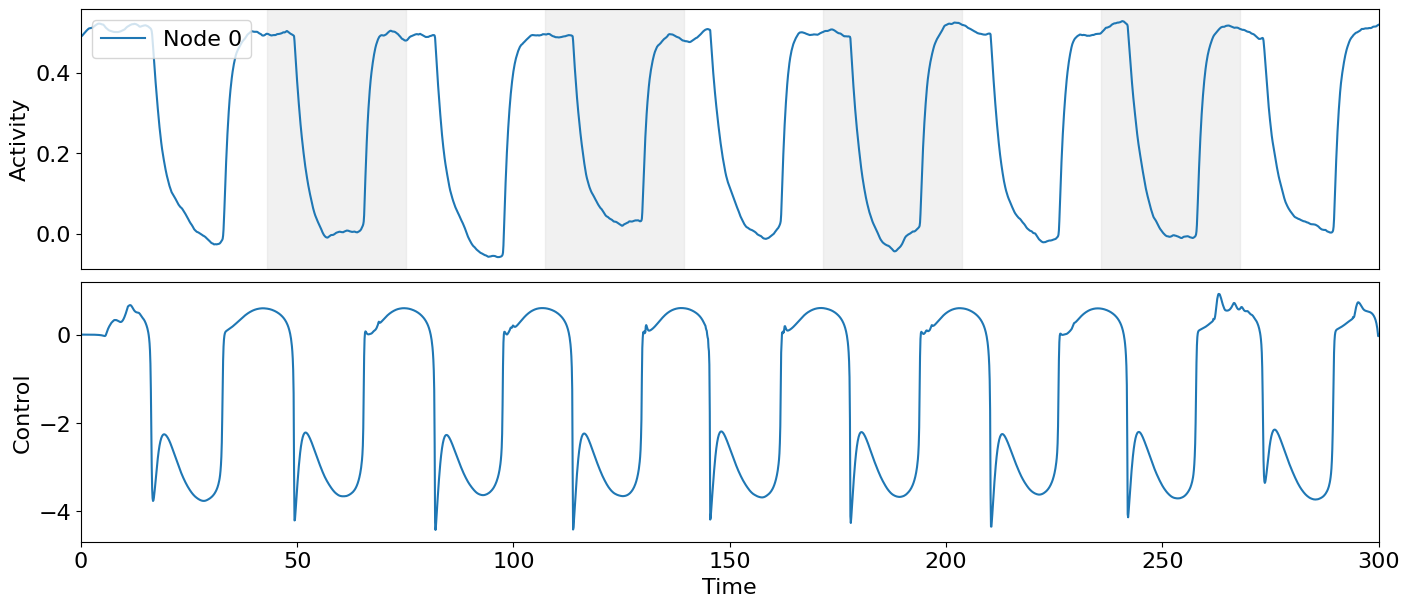

pind =  2
itar =  0
itar =  1
itar =  2
itar =  3
itar =  4
M =  20
sigma =  0.005
Optimal control with target oscillation period
Compute control for a noisy system
Mean cost in iteration 0: -0.28603391249039534
Mean cost in iteration 5: -0.286459126154207
Mean cost in iteration 10: -0.2863559963908972
Mean cost in iteration 15: -0.286203439969804
Mean cost in iteration 20: -0.28626326452741585
Minimal cost found at iteration 9
Final cost validated with 200 noise realizations : -0.28623149714840523
step history :  [250.0, 2000.0, 1000.0, 2000.0, 1000.0, 1000.0, 2000.0, 2000.0, 2000.0, 1000.0, 0.0, 2000.0, 2000.0, 15.625, 62.5, 2000.0, 2000.0, 15.625, 2000.0, 2000.0, 2000.0]


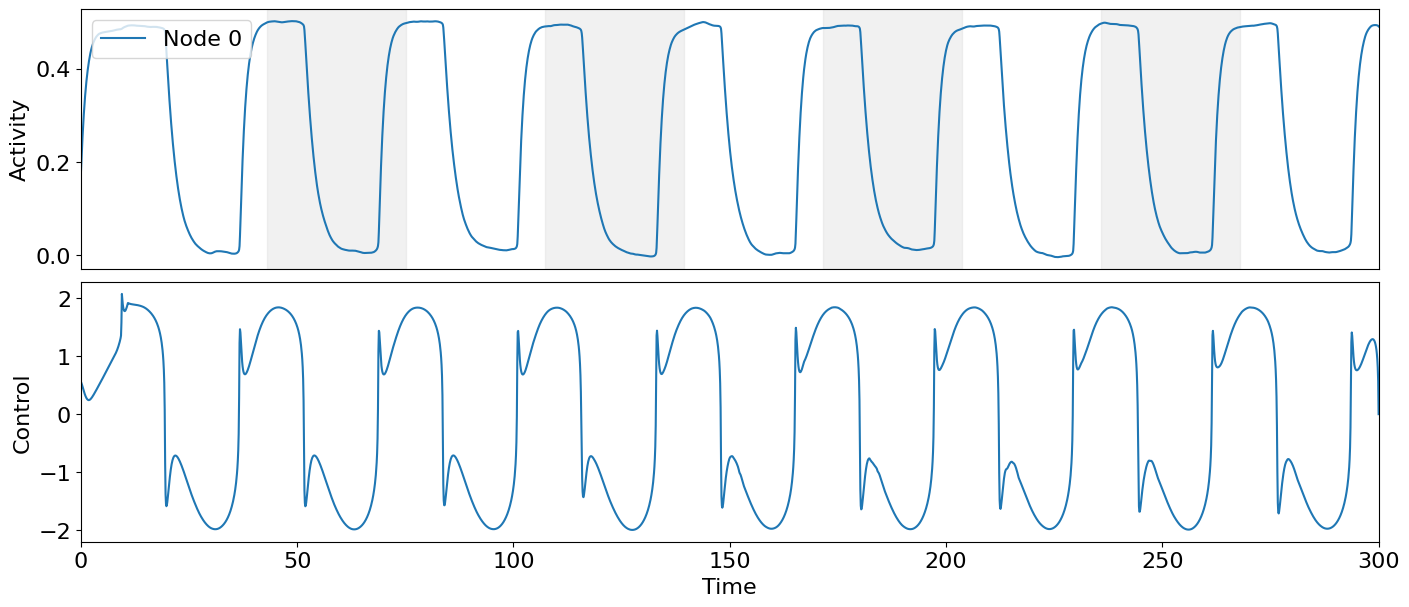

sigma =  0.02
Optimal control with target oscillation period
Compute control for a noisy system
Mean cost in iteration 0: -0.2849711564066696
Mean cost in iteration 5: -0.28604211206564084
Mean cost in iteration 10: -0.2828715732396676
Mean cost in iteration 15: -0.28598812077349095
Mean cost in iteration 20: -0.28644516307203993
Minimal cost found at iteration 9
Final cost validated with 200 noise realizations : -0.28559560065751727
step history :  [2000.0, 1000.0, 2000.0, 15.625, 2000.0, 0.030517578125, 500.0, 125.0, 1000.0, 125.0, 125.0, 2000.0, 2000.0, 500.0, 500.0, 0.00011920928955078125, 125.0, 125.0, 2000.0, 0.0, 31.25]


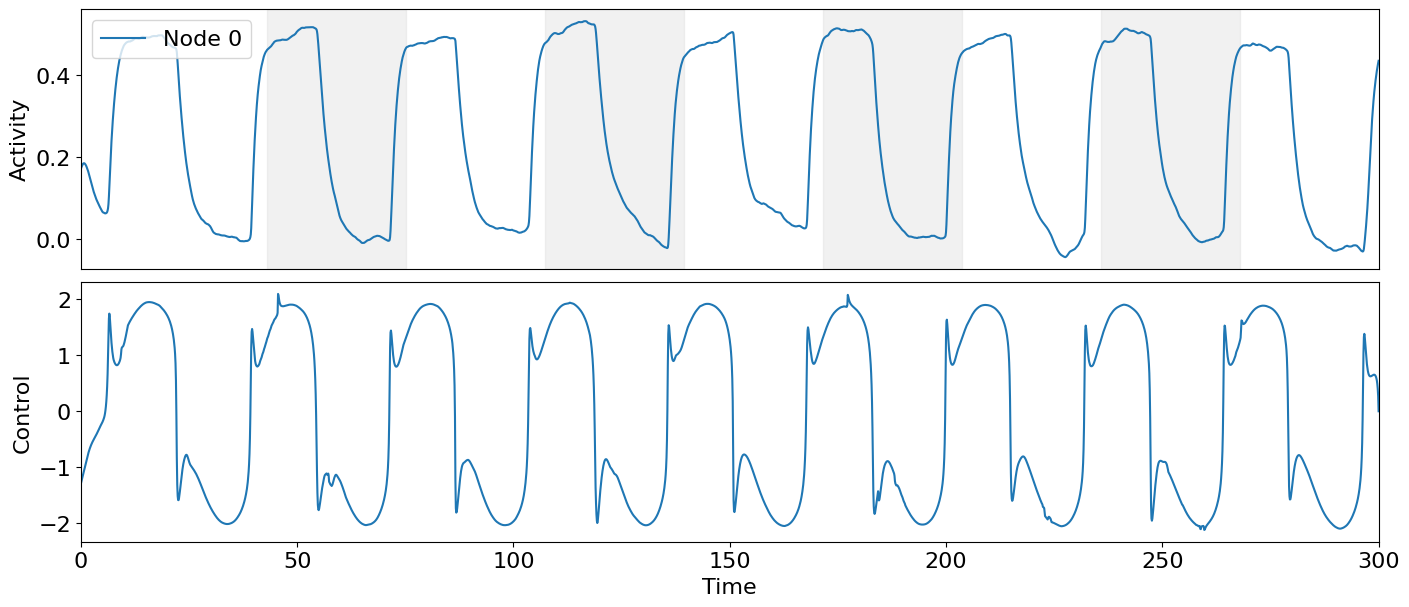

M =  40
sigma =  0.005
Optimal control with target oscillation period
Compute control for a noisy system
Mean cost in iteration 0: -0.2861018036942116
Mean cost in iteration 5: -0.2863281703094037
Mean cost in iteration 10: -0.2861303973318939
Mean cost in iteration 15: -0.28624411476918105
Mean cost in iteration 20: -0.28656180218241195
Minimal cost found at iteration 6
Final cost validated with 200 noise realizations : -0.2864480590060713
step history :  [1000.0, 2000.0, 1000.0, 250.0, 31.25, 31.25, 2000.0, 500.0, 500.0, 3.90625, 2000.0, 0.9765625, 2000.0, 1000.0, 2000.0, 62.5, 2000.0, 1000.0, 2000.0, 2000.0]


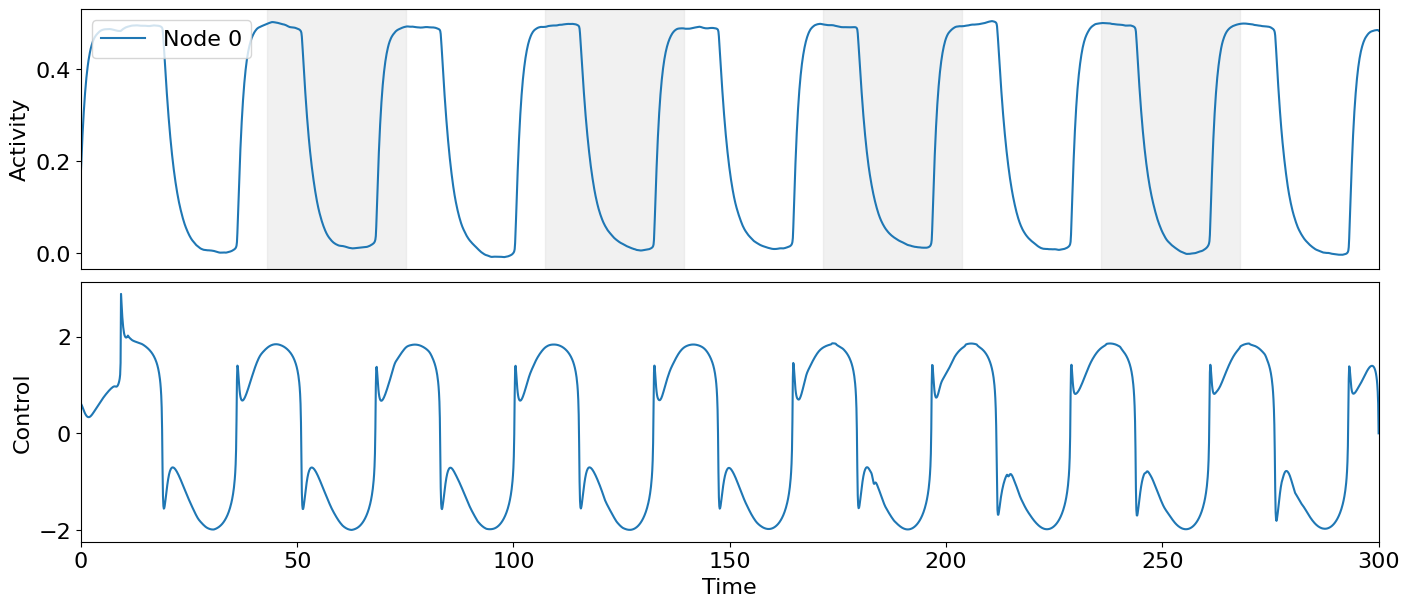

sigma =  0.02
Optimal control with target oscillation period
Compute control for a noisy system
Mean cost in iteration 0: -0.2866763728868317
Mean cost in iteration 5: -0.2853832048565864
Mean cost in iteration 10: -0.2862402740097304
Mean cost in iteration 15: -0.28526880003292343
Mean cost in iteration 20: -0.2859167930197848
Minimal cost found at iteration 0
Final cost validated with 200 noise realizations : -0.2859117603063378
step history :  [2000.0, 2000.0, 0.0152587890625, 2000.0, 250.0, 500.0, 3.90625, 15.625, 15.625, 1.862645149230957e-06, 500.0, 2000.0, 500.0, 2000.0, 0.48828125, 1000.0, 500.0, 1000.0, 2000.0, 1000.0]


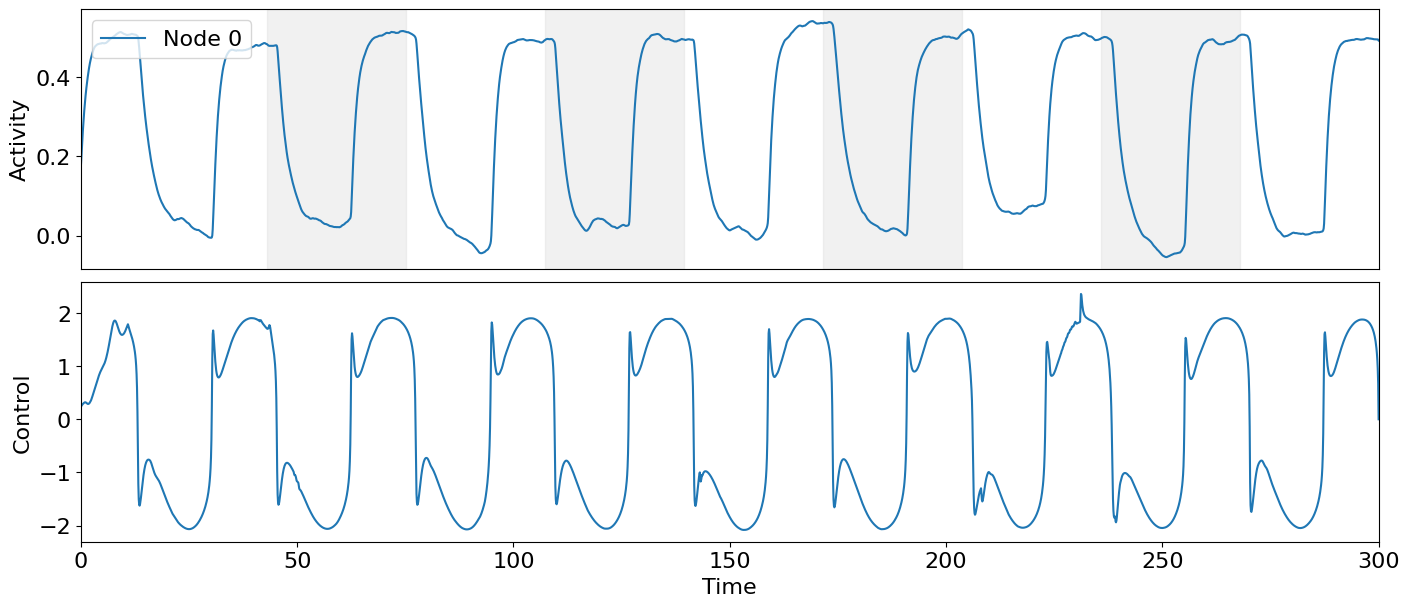

In [154]:
it = 20
### different w2 for different points: down state 2. * 1e-4 // up state 2. * 1e-5 // osc state
w2 = 2. * 1e-5

pr = np.arange(0,101,5)
maxstr = 5.
nmaxdel = model.getMaxDelay()
init_control = zero_control.copy()

for pind in range(len(comp_points)):

    print("pind = ", pind)
    p = comp_points[pind]
    
    testd = 1000.
    model.params.duration = testd
    test_input = ZeroInput().generate_input(duration=testd+model.params.dt, dt=model.params.dt)
    model.params["exc_ext"] = test_input + p[0]
    model.params["inh_ext"] = test_input + p[1]
    model.run()

    einit = np.zeros((N, nmaxdel+1))
    iinit = np.zeros((N, nmaxdel+1))


    for n in range(N):
        einit[n,:] = model.exc[n,-1]
        iinit[n,:] = model.inh[n,-1]

    model.params.duration = duration

    model.params["exc_ext"] = zero_control[:,0,:] + p[0]
    model.params["inh_ext"] = zero_control[:,0,:] + p[1]

    model.params["exc_init"] = einit
    model.params["inh_init"] = iinit

    model.run()

    for itar in range(len(target_array)):

        print("itar = ", itar)

        if itar not in [4]:
            continue

        target_period = target_array[itar]
        i00 = 0
        int0 = np.around( (duration - i00 * target_period) / model.params.dt, 0).astype(int)     
        while int0 > 220:
            i00 += 1
            int0 = np.around( (duration - i00 * target_period) / model.params.dt, 0).astype(int)

        for im in range(len(M_array)):

            print("M = ", M_array[im])

            for isi in range(len(sigma_array)):
            
                print("sigma = ", sigma_array[isi])

                model.params.sigma_ou = sigma_array[isi]
                
                model_controlled = oc_wc.OcWc(model, target_period, print_array=pr, cost_interval=(int0,None), cost_matrix=costmat, control_matrix = controlmat, M=M_array[im], M_validation=200)
                model_controlled.maximum_control_strength = maxstr
                model_controlled.weights["w_p"] = 0.
                model_controlled.weights["w_2"] = w2
                model_controlled.weights["w_f"] = 1.
                model_controlled.step = 1e3

                if type(results["controls"][pind][itar][im][isi]) != type(None):
                    model_controlled.control = results["controls"][pind][itar][im][isi].copy()
                    model_controlled.update_input()

                model_controlled.optimize(it)
                results["controls"][pind][itar][im][isi] = model_controlled.control.copy()

                timings, periods = getperiods(model_controlled.get_xs(), target_period, duration)
                results["timings"][pind][itar][im][isi] = timings
                results["periods"][pind][itar][im][isi] = periods

                print("step history : ", model_controlled.step_sizes_history)

                fname = str(pind) + "_" + str(itar) + "_"  + str(im) + "_" + str(isi) + ".png"
                plot_oc_nw(N, duration, dt, model_controlled.get_xs(), target_period,  model_controlled.control, filename= os.path.join(dir, fname))

In [155]:
with open('osc_1n.pickle', 'wb') as f:
    pickle.dump(results, f)

In [161]:
with open('osc_1n.pickle', 'rb') as f:
    res_read = pickle.load(f)
    print(res_read.keys() )

results = res_read.copy()

dict_keys(['controls', 'periods', 'timings'])


In [162]:
xl = ["Down F", "Up F", "Osc F"]

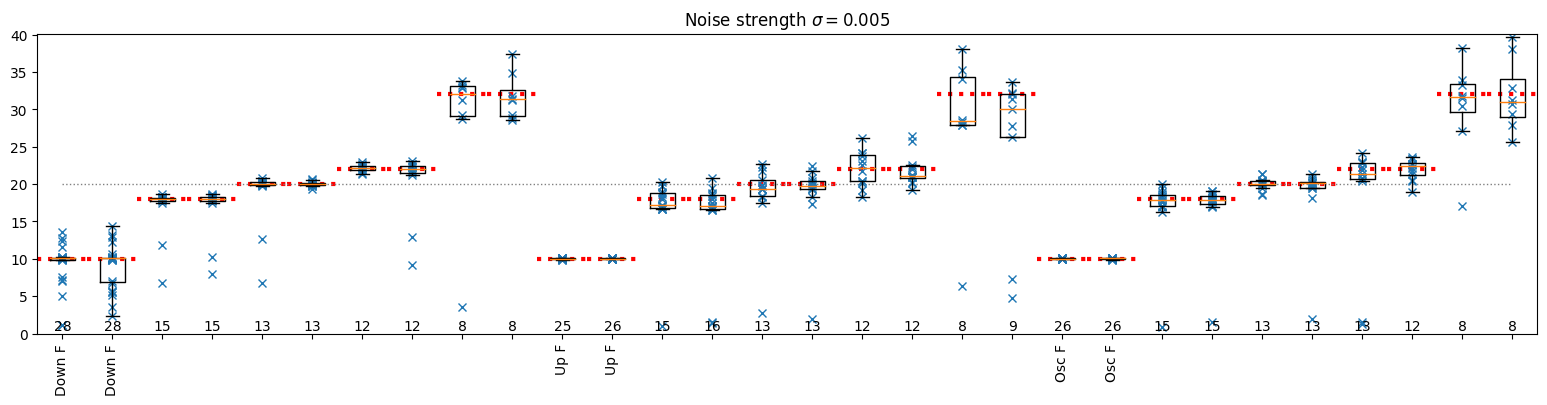

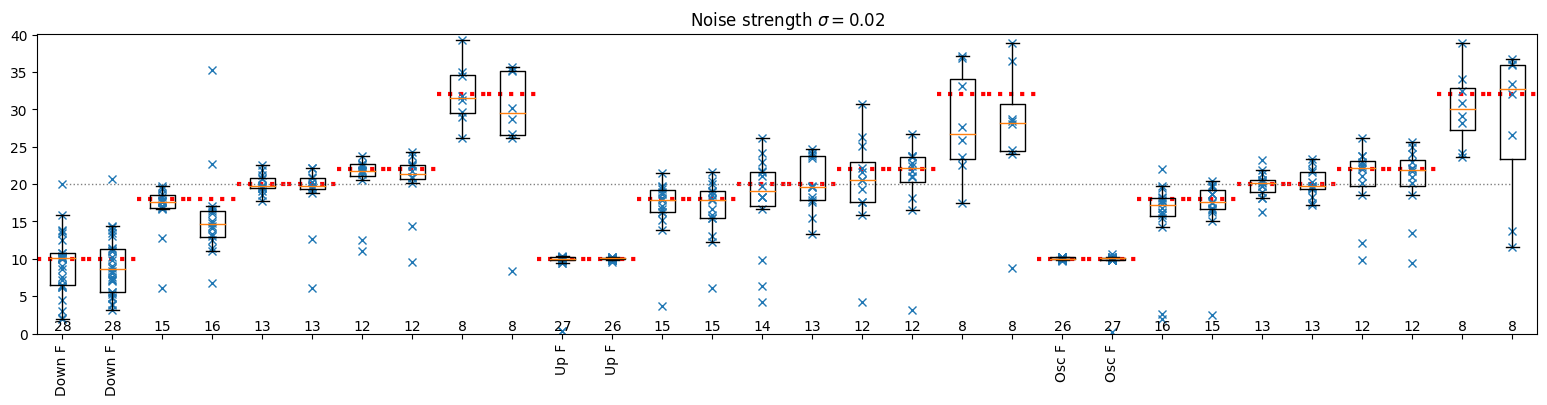

In [163]:
for isi in range(len(sigma_array)):
    ydata = []
    xlabels = []
    fig = plt.figure(figsize =(15, 3))
    ax = fig.add_axes([0, 0, 1, 1])

    xpos = 0

    for pind in range(len(comp_points)):
        for itar in range(len(target_array)):

            target_period = target_array[itar]
            #xpos = 15*imet + 5*pind + itar

            for im in range(len(M_array)):

                if itar != 0:
                    xlabels.append("")
                else:
                    xlabels.append(xl[pind])

                data = results["periods"][pind][itar][im][isi]
                ydata_ = []
                
                if data is None:
                    ydata.append(ydata_)
                    xpos += 1
                    continue

                n_datapoints = 0

                for n in range(N):
                    n_datapoints += len(data[n])
                    
                    if len(data[n]) != 0:
                        for dpoint in data[n]:
                            ax.plot(xpos+1, dpoint, marker="x", color=colors[n])
                            ydata_.append(dpoint)

                ydata.append(ydata_)

                ax.text(xpos+1, 1, str(n_datapoints), horizontalalignment='center', verticalalignment='center')
                ax.hlines(target_period, xpos+0.5, xpos+1.5, linestyle=":", color="red", linewidth =3)

                xpos += 1


    ax.boxplot(ydata, showfliers=False)
    ax.plot()
    ax.hlines(period, 1., len(xlabels), linestyle=":", color="grey",linewidth = 1)
    ax.set_xticklabels(xlabels, rotation=90)
    ax.set_ylim(0., 2.*period)
    ax.set_title(r"Noise strength $\sigma = $" + "{}".format(sigma_array[isi]))
    plt.show()
    fig.savefig(os.path.join(dir, "periods_" + str(isi) + ".png"), bbox_inches='tight')